**Lab 112** Niech $\eta_n, n\ge 1$ będzie ciągiem niezależnych zmiennych losowych o takim samym rozkładzie oraz $P(\eta_1=1)=p$ i $P(\eta_1=-1)=q=1-p$. Niech $S_n=\sum_{i=1}^{n}\eta_i$ dla $n>0$ oraz $S_0=0$.

Oblicz $P(S_t=j|S_{t_0}=i)$ dla jakiegoś $t>t0$.

Random Variates : 
 [ 1 -1 -1  1 -1  1 -1  1  1  1 -1  1  1  1  1  1 -1 -1  1 -1] ...


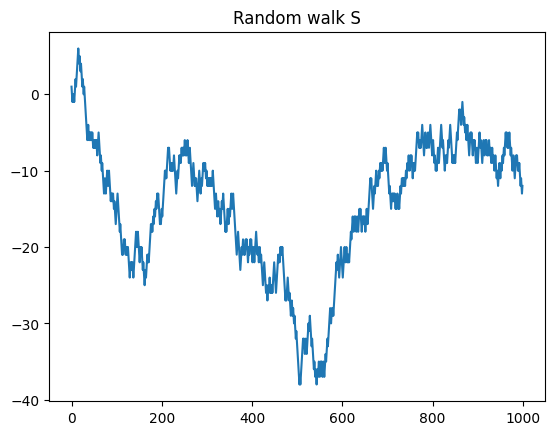

In [13]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

p, q = 0.51, 0.49
N = 1000
rv = bernoulli (p, q)
eta = 2 * bernoulli.rvs(p, q, size = N) - 1
print("Random Variates : \n", eta[:20], "...")


S = np.cumsum(eta)
plt.plot(S)
plt.title("Random walk S")
plt.show()

pod warunkiem że k jest całkowite:
$
S_n = \sum \eta_i
$
$
S_0 = 0
$
$
\mathbb{P}\bigl(S_n = j \mid S_0 = i\bigr)
$
$
\Rightarrow \quad
j = (n-k)\cdot 1 + k \cdot (-1) + i
$
$
j = n - 2k + i
\quad \Rightarrow \quad
k = \frac{n + i - j}{2}
$
$
\Rightarrow \quad
\mathbb{P}\bigl(S_n = j \mid S_0 = i\bigr)
= \binom{n}{k} q^{k} p^{\,n-k}
$
wpw: 0

In [11]:
import numpy as np
from scipy.special import comb

# Parametry
n = 4       # liczba kroków
start = 0
target = 2

# 1. Obliczenie teoretyczne (Wzór)
delta = target - start
if (n + delta) % 2 != 0 or abs(delta) > n:
    prob_theory = 0
else:
    k = (n + delta) // 2
    prob_theory = comb(n, k) * (p ** k) * ((1-p) ** (n-k))

print(f"Teoria: {prob_theory:.4f}")

# 2. Symulacja Monte Carlo
simulations = 100000
# Generujemy 100k ścieżek po 4 kroki
moves = np.random.choice([1, -1], size=(simulations, n), p=[p, 1-p])
finals = start + np.sum(moves, axis=1)

prob_sim = np.mean(finals == target)
print(f"Symulacja: {prob_sim:.4f}")

Teoria: 0.2500
Symulacja: 0.2512


**Lab 114**  (czas przekroczenia poziomu) Niech $S_n$ będzie symetrycznym błądzeniem losowym. Określmy
$$\tau=\min\{n : |S_n| = K\}.$$
Znajdź eksperymentalnie $E(\tau)$.

In [14]:
import numpy as np

def simulate_hitting_time(K, max_steps=1_000_000):
    position = 0
    steps = 0

    while abs(position) < K:
        step = np.random.choice([-1, 1])
        position += step
        steps += 1

        if steps >= max_steps:
            return max_steps

    return steps

K_values = [5, 10, 20] # Sprawdzimy dla kilku różnych K
num_simulations = 2000

print(f"{'K':<5} | {'Teoria (K^2)':<15} | {'Eksperyment':<15} | {'Błąd'}")
print("-" * 50)

for K in K_values:
    times = [simulate_hitting_time(K) for _ in range(num_simulations)]
    avg_time = np.mean(times)
    theoretical = K**2

    print(f"{K:<5} | {theoretical:<15} | {avg_time:<15.2f} | {abs(avg_time - theoretical):.2f}")

K     | Teoria (K^2)    | Eksperyment     | Błąd
--------------------------------------------------
5     | 25              | 24.52           | 0.48
10    | 100             | 100.94          | 0.94
20    | 400             | 403.91          | 3.91
